## **Predicting optimum number of clusters**

## The Sparks Foundation Data Science and Business Analytics Tasks.

### Task2 : Predicting using unsupervised ML

### Objective :From the given dataset predict the optimum number of cluster and present it visually

### AUTHOR: Oyibo Favour

In [17]:
#import needed modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the iris dataset
iris = pd.read_csv('Downloads/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
#shape of data
iris.shape

(150, 6)

### Randomly select data for train and test from the iris dataset

In [4]:
#train sample data
iris_df = iris.sample(frac=0.8, random_state=23)
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,140,6.9,3.1,5.4,2.1,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
...,...,...,...,...,...,...
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


In [5]:
#drop the species column
train_sample_df = iris_df.drop(columns=['Id','Species'])
train_sample_df.reset_index(drop=True)
train_sample = train_sample_df.values
train_sample

array([[6.9, 3.1, 5.4, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.4, 1.7, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [4.8, 3.1, 1.6, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 2.5, 3.9, 1.1],
       [4.9, 3.1, 1.5, 0.1],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 2.8, 6.7, 2. ],
       [5. , 3

In [6]:
#new sample data
new_sample_df = iris[~iris.isin(iris_df)]
new_sample = new_sample_df.dropna().drop(columns=['Id','Species'])
new_sample.reset_index(drop=True).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.4,1.4,0.3
1,4.8,3.0,1.4,0.1
2,5.7,4.4,1.5,0.4
3,5.1,3.7,1.5,0.4
4,5.0,3.0,1.6,0.2


In [7]:
#shape of train and test data
print('train_sample shape:', train_sample.shape)
print('new_sample shape:', new_sample.shape)

train_sample shape: (120, 4)
new_sample shape: (30, 4)


### Optimum number of clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
ks = range(1,11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(train_sample)
    inertias.append(model.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


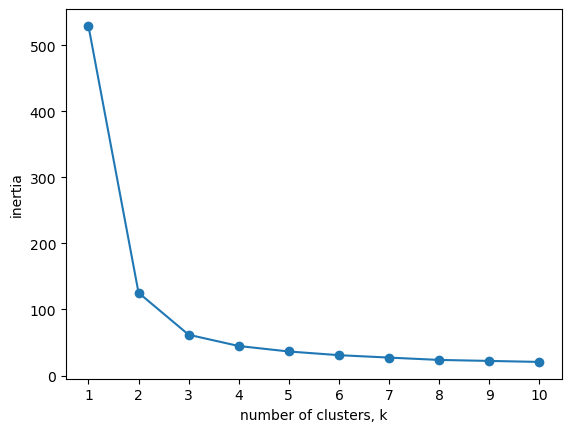

In [10]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


**From the diagram above the optimum number of cluster is 3**

In [11]:
#Applying KMeans on the iris test dataset using the optimum cluster number
model = KMeans(n_clusters=3, random_state=23)
model.fit(train_sample)
labels = model.predict(train_sample)
print('labels:','\n',labels)
print('\n')
print('inertia:', model.inertia_)

labels: 
 [1 1 2 0 2 1 0 1 0 2 2 0 1 0 0 2 2 2 1 0 1 0 0 0 1 0 0 2 2 2 0 2 0 1 0 0 2
 2 2 1 1 0 2 0 2 2 2 1 0 2 1 1 0 1 2 1 1 2 0 1 1 0 2 0 1 2 2 1 2 2 0 0 1 0
 0 1 2 2 0 2 1 2 1 1 2 0 2 2 2 2 0 2 2 2 2 2 2 2 1 1 0 1 2 0 1 2 0 2 2 1 0
 0 2 0 2 2 0 1 2 2]


inertia: 61.772769607843145


In [12]:
#predict on new_sample
new_labels = model.predict(new_sample.values)
print('new_labels:','\n',new_labels)

new_labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 2]


## Evaluting the cluster

In [13]:
species = iris_df['Species']
species

139     Iris-virginica
125     Iris-virginica
67     Iris-versicolor
3          Iris-setosa
113     Iris-virginica
            ...       
96     Iris-versicolor
35         Iris-setosa
108     Iris-virginica
74     Iris-versicolor
66     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [14]:
#Evaluate on the train dataset
df = pd.DataFrame({'labels':labels, 'Species':species})

ct = pd.crosstab(df['labels'], df['Species'])
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,37,0,0
1,0,3,29
2,0,39,12


In [15]:
#Evaluate on new dataset
species = new_sample_df['Species'].dropna()

df = pd.DataFrame({'new_labels':new_labels, 'Species':species})

ct = pd.crosstab(df['new_labels'], df['Species'])
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
new_labels,,,
0,13,0,0
1,0,0,7
2,0,8,2


## Visualizing Clustering

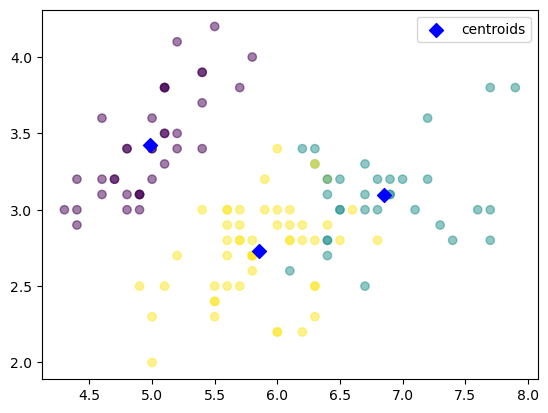

In [16]:

#Assing the first two columns of train_samples: xs and xy
xs = train_sample[:,0]
ys = train_sample[:,1]

#make a scatter plot of xs and xy, using labels to define the colors
plt.scatter( xs , ys, c=labels,alpha=0.5)

#assign the cluster centers:centroids
centroids = model.cluster_centers_

#assign the columns of the centroids: centroids_x and centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

#make a scatterplot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y,marker='D',s=50,color='blue',label='centroids' )
plt.legend()
plt.show()

**From the diagram above, Each point represents an iris sample and its colored according to the cluster of that sample.**